# Cardio_train EDA

Features:

Age | Objective Feature | age | int (days)  
Height | Objective Feature | height | int (cm) |  
Weight | Objective Feature | weight | float (kg) |  
Gender | Objective Feature | gender | categorical code 1 = women, 2 = men |  
Systolic blood pressure | Examination Feature | ap_hi | int |  
Diastolic blood pressure | Examination Feature | ap_lo | int |  
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
Smoking | Subjective Feature | smoke | binary |  
Alcohol intake | Subjective Feature | alco | binary |  
Physical activity | Subjective Feature | active | binary |  
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# loading dataset
df = pd.read_csv("../Data/cardio_train.csv", sep=";")
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


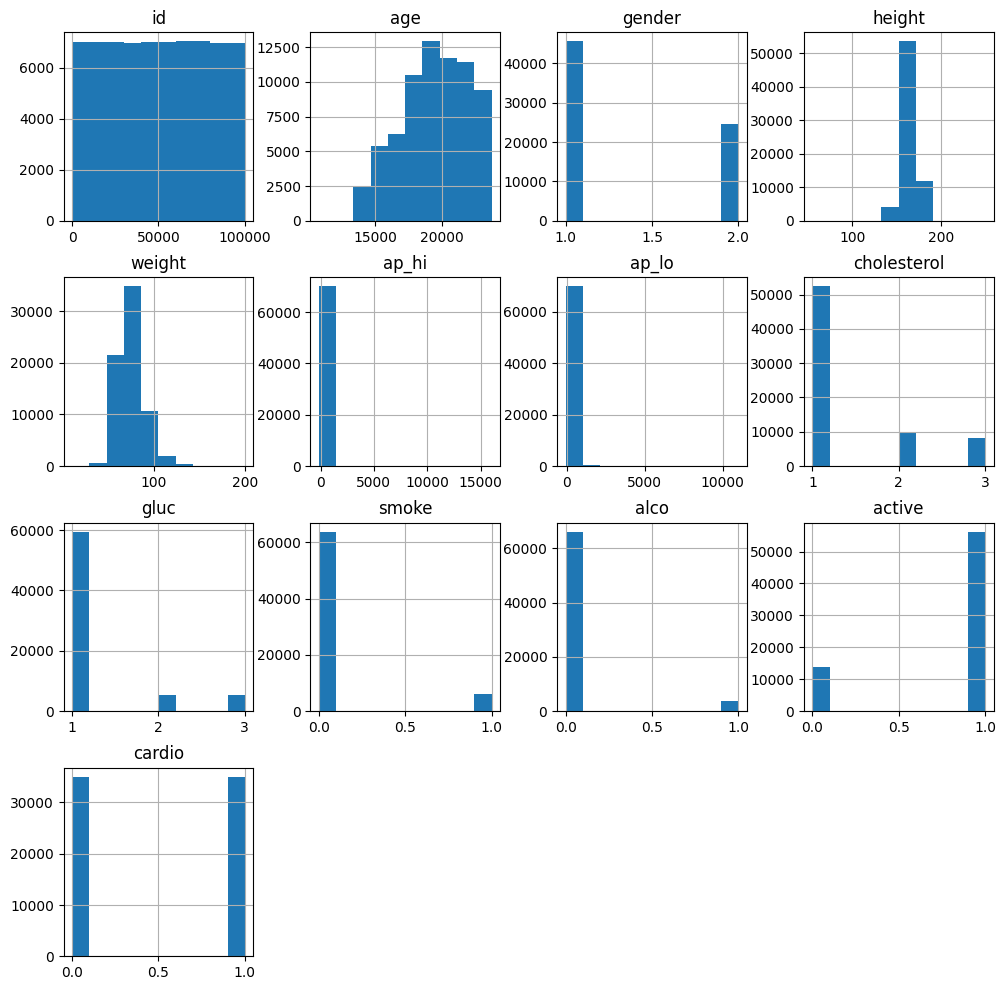

In [5]:
df.hist(figsize=(12, 12));

a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [6]:
df.cardio.value_counts()

# 35021 negative
# 34979 positive

0    35021
1    34979
Name: cardio, dtype: int64

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

Text(0.5, 1.0, 'Amount of people with high cholesterol')

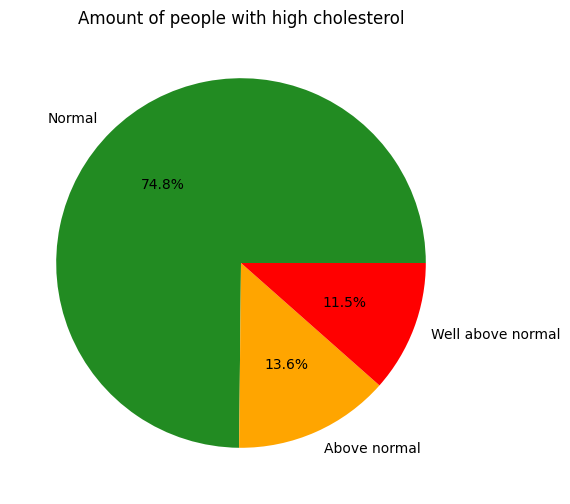

In [7]:
fig = plt.figure(figsize=(6, 6))
plt.pie(
    df["cholesterol"].value_counts(),
    labels=["Normal", "Above normal", "Well above normal"],
    autopct="%1.1f%%",
    colors=["forestgreen", "orange", "red"],
)
plt.title("Amount of people with high cholesterol", loc="center")


c) Hur ser åldersfördelningen ut? Rita ett histogram.

In [8]:
df["age_years"] = df["age"]/365

<Axes: xlabel='age_years', ylabel='Count'>

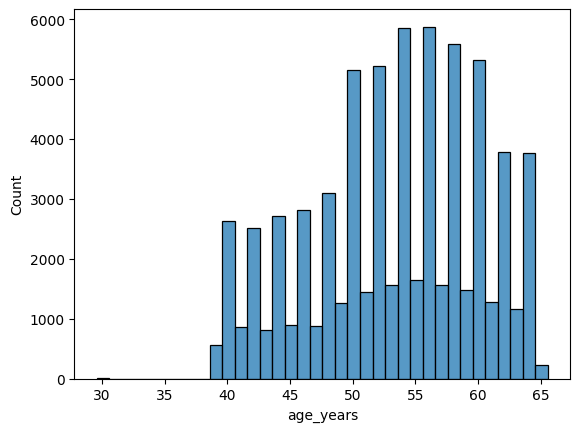

In [9]:
sns.histplot(df, x="age_years", binwidth=1)

# Mycket vanligare med jämn ålder än udda. Sannolikt för att man blir kallad på hälsokontroll vid en väldigt specifik ålder.

<Axes: xlabel='age_years', ylabel='Count'>

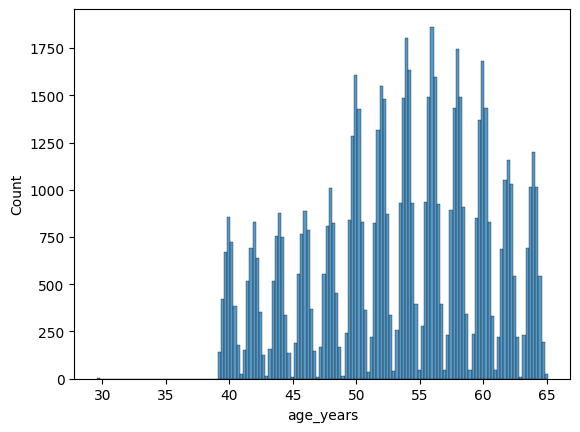

In [10]:
sns.histplot(df, x="age_years", binwidth=0.25)

# med fler bins ser vi ett ännu tydligare mönster där vissa åldrar är mycket vanligare än andra.

d) Hur stor andel röker?

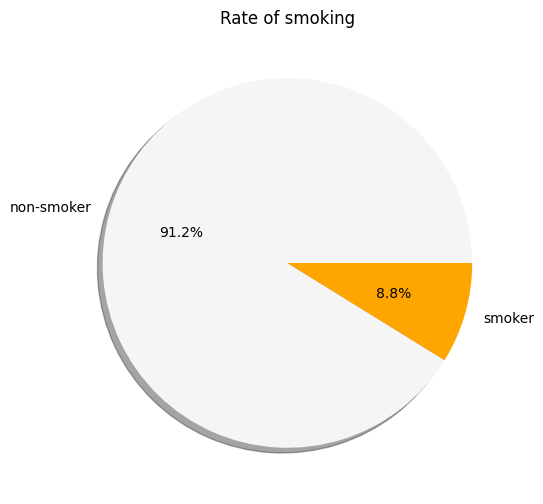

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.pie(
    df["smoke"].value_counts(),
    labels=["non-smoker", "smoker"],
    autopct="%1.1f%%",
    colors=["whitesmoke", "orange"],
    shadow=True
)
plt.title("Rate of smoking", loc="center");

e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

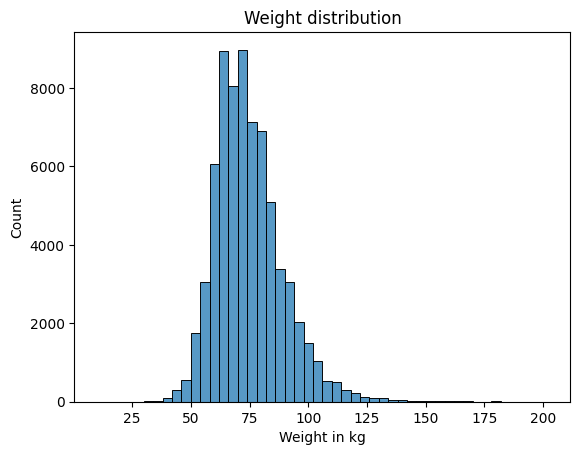

In [12]:
sns.histplot(df, x="weight", binwidth=4)
plt.title("Weight distribution")
plt.xlabel("Weight in kg");

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

Text(0.5, 0, 'Height in cm')

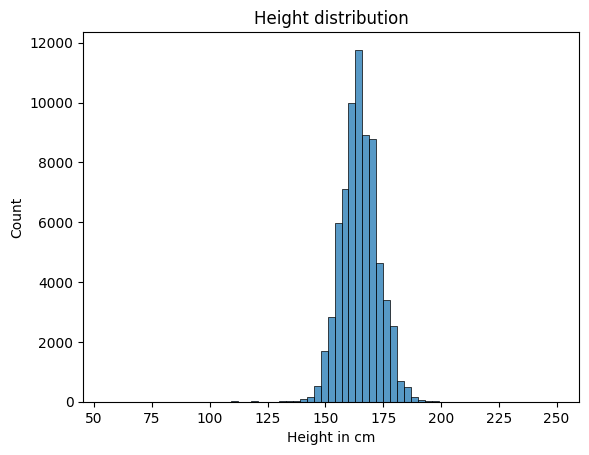

In [13]:
sns.histplot(df, x="height", binwidth=3)
plt.title("Height distribution")
plt.xlabel("Height in cm")

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

In [20]:
print("Women")
print(df[df["gender"] == 1]["cardio"].value_counts())
print()
print("Men")
print(df[df["gender"] == 2]["cardio"].value_counts())

# 1 är hjärt-kärlsjukdom

Women
0    22914
1    22616
Name: cardio, dtype: int64

Men
1    12363
0    12107
Name: cardio, dtype: int64


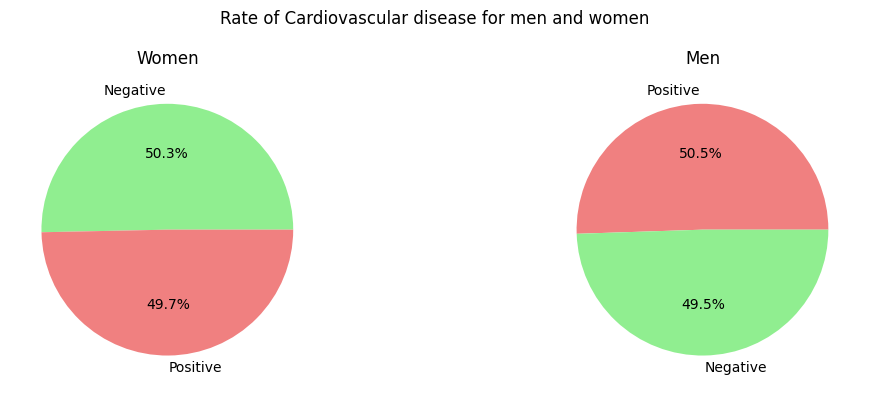

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
a, b = "Negative", "Positive"
c, d = "lightgreen", "lightcoral"

for i, ax in enumerate(axes, 1):
    ax.pie(df[df["gender"] == i]["cardio"].value_counts(), autopct="%2.1f%%", labels=[a, b], colors = [c, d])
    a, b = b, a # switching colors and labels
    c, d = d, c

   
axes[0].set_title("Women")
axes[1].set_title("Men")
fig.suptitle("Rate of Cardiovascular disease for men and women")
fig.tight_layout()



2.1.0 - Feature engineering BMI  
Skapa en feature för BMI (Body Mass Index), läs på om formeln på wikipedia.  
a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket  
range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.  
b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese  
(class II), obese (class III).

In [85]:
# Creating new column for BMI
df["BMI"] = df["weight"]/(df["height"]/100)**2

# Checking some arbitrary numbers, I chose to do the cut where the data loss is small and the likelyhood that numbers are 
# incorrectly entered is high.
high = 60
low = 14
print(f"Number of people with BMI above {high}: {len(df[df['BMI'] > high])}")
print(f"Number of people with BMI below {low}: {len(df[df['BMI'] < low])}")


df = df[df["BMI"] < high]
df = df[df["BMI"] > low]

Number of people with BMI above 60: 66
Number of people with BMI below 14: 13


In [86]:
df.reset_index(drop=True, inplace=True)

In [87]:
pd.options.mode.chained_assignment = None  # Removing warning

df["BMI-class"] = ""

for i in range(len(df)):
    if df["BMI"][i] < 18.5:
        df["BMI-class"][i] = "Underweight"

    elif df["BMI"][i] < 25:
        df["BMI-class"][i] = "Normal"

    elif df["BMI"][i] < 30:
        df["BMI-class"][i] = "Overweight"

    elif df["BMI"][i] < 35:
        df["BMI-class"][i] = "Obese (class 1)"

    elif df["BMI"][i] < 40:
        df["BMI-class"][i] = "Obese (class 2)"

    else:
        df["BMI-class"][i] = "Obese (class 3)"       

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI-class
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Normal
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Obese (class 1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Normal
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69915,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.927438,Overweight
69916,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.472681,Obese (class 3)
69917,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.353579,Obese (class 1)
69918,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.099251,Overweight


2.1.1 - Feature engineering blodtryck  
Släng bort samples med orimliga blodtryck och outliers. Likt uppgift 2.1.0 är det inte trivialt att sätta  
gränserna. Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel. Beskriv hur du kommer  
fram till gränserna

In [88]:
# additional data cleaning:
df = df[df["ap_hi"] < 360] # highest recorded bloodpressure
df = df[df["ap_hi"] > 30] # Likely measurement error
df = df[df["ap_lo"] < 350] # highest recorded bloodpressure
df = df[df["ap_lo"] > 30] # Likely measurement error
df.reset_index(drop=True, inplace=True)

In [89]:
# creating emtpy column
df["Blood-pressure"] = ""

for i in range(len(df)):
    if df["ap_hi"][i] < 120 and df["ap_lo"][i] < 80:
        df["Blood-pressure"][i] = "Healthy"

    elif df["ap_hi"][i] < 130 and df["ap_lo"][i] < 80:
        df["Blood-pressure"][i] = "Elevated"

    elif df["ap_hi"][i] < 140 and df["ap_lo"][i] < 90:
        df["Blood-pressure"][i] = "Stage 1 hypertension"

    elif df["ap_hi"][i] < 1800 and df["ap_lo"][i] < 120:
        df["Blood-pressure"][i] = "Stage 2 hypertension"

    else:
        df["Blood-pressure"][i] = "Hypertension crisis"

2.2.0 - Visualiseringar andel sjukdomar  
Skapa barplots med en feature mot andelen positiva för hjärt-kärl sjukdom. Exempelvis blodtryckskategorier
mot andel positiva, BMI kategori mot andel positiva mm. Gör dessa plots i en figur med flera subplots.

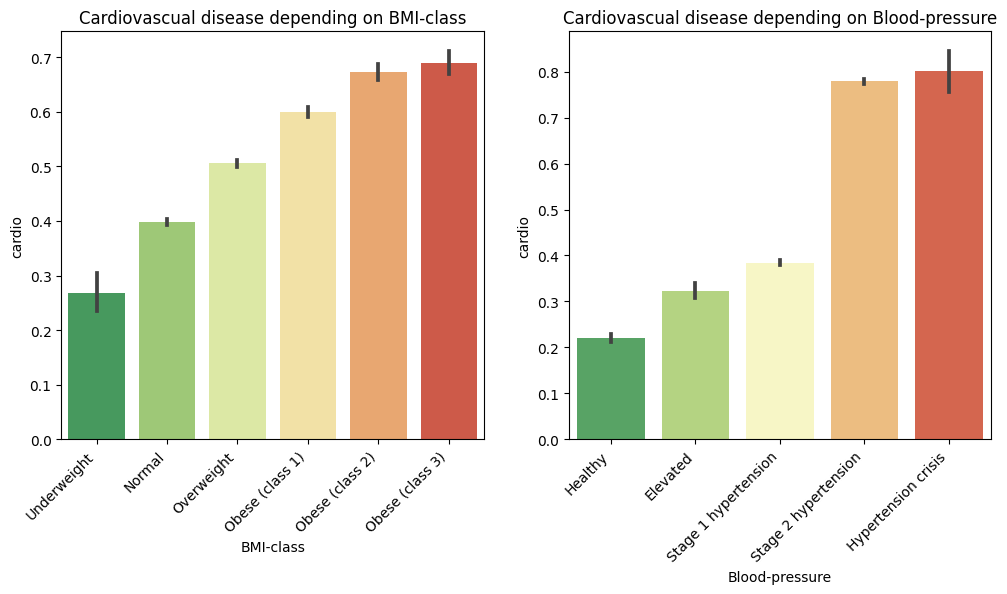

In [92]:
# sorting values in BMI-class and Blood-pressure
df["BMI-class"] = pd.Categorical(
    df["BMI-class"],
    [
        "Underweight",
        "Normal",
        "Overweight",
        "Obese (class 1)",
        "Obese (class 2)",
        "Obese (class 3)",
    ],
)

df["Blood-pressure"] = pd.Categorical(
    df["Blood-pressure"],
    [
        "Healthy",
        "Elevated",
        "Stage 1 hypertension",
        "Stage 2 hypertension",
        "Hypertension crisis",
    ],
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.autofmt_xdate(rotation=45)


columns = ["BMI-class", "Blood-pressure"]
for i in range(2):
    sns.barplot(
        df.sort_values(columns[i]),
        x=columns[i],
        y="cardio",
        palette="RdYlGn_r",
        ax=axes.flat[i],
    )
    # _r reverses the colormap
    axes.flat[i].set_title(f"Cardiovascual disease depending on {columns[i]}")

    # we note a clear positive correlation between both obesity and high blood-pressure versus cardiovascular disease


2.2.1 - Visualiseringar korrelation  
Skapa en heatmap av korrelationer och se om du hittar features som är starkt korrelerade, dvs nära 1 eller
features som är starkt negativt korrelerade, dvs nära -1. Kan du förklara varför de kan vara korrelerade?

C:\Users\hakan\AppData\Local\Temp\ipykernel_15220\1457539827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


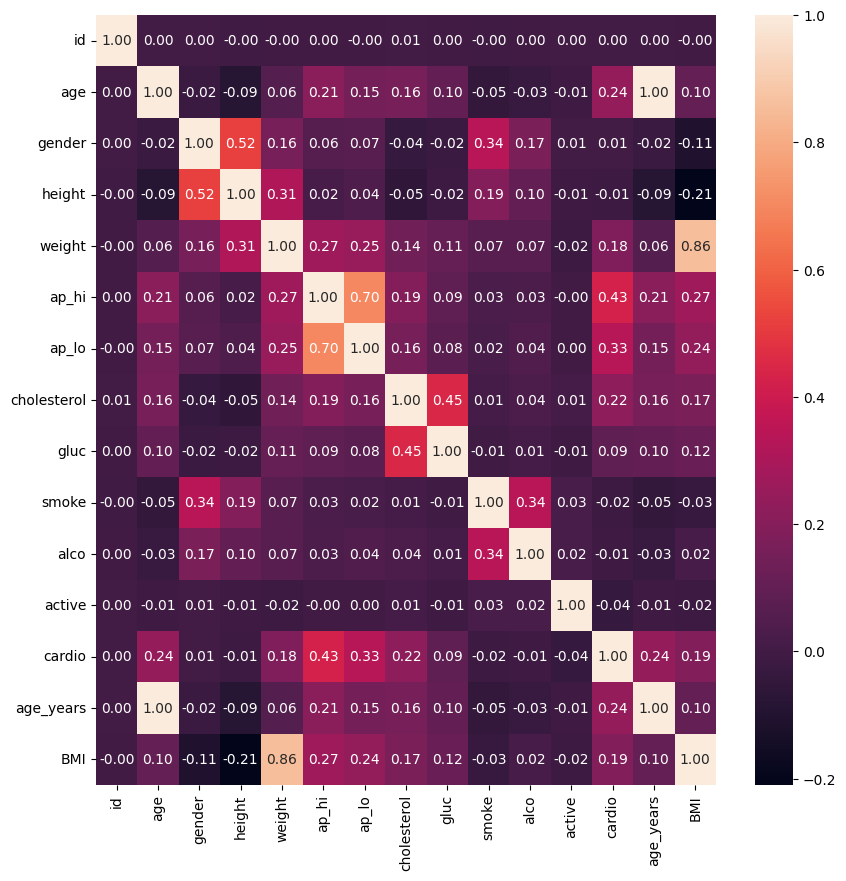

In [93]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f");

# De tydligaste korrelationerna är relativt triviala:
# Age och Age_years har korrelationen 1
# BMI har stark korrelation med Weight, och relativt stark negativ korrelation med height
# ap_hi har stark korrelation med ap_lo vilket också är att vänta sig
# gender och height har positiv korrelation då kvinnor (1) är genomsnittligt kortare än män (2)
# Vad gäller target-variabeln cardio så ser vi störst korrelation med blodtryck följt av ålder, kolesterol och sedan BMI

In [95]:
# saving dataframe to csv to use in next part
df.to_csv("heart_modified")